In [1]:

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from scipy.interpolate import CubicSpline
import seaborn as sns
import datetime as dt
import matplotlib.ticker as ticker

sns.set_theme(font_scale=1, style="ticks", palette=None, rc={'figure.dpi': 150})

In [2]:
filepath = r'/Users/pietrocaprioglio/Documents/GitHub/ML-test-perovskite-database/df_for_ML_cleaned_reduced.csv'

# savepath = '/Users/pietrocaprioglio/Library/CloudStorage/Dropbox/Oxford_PROJECTS/Python_scripts/'

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.head()

,Unnamed: 0,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,ETL_stack_sequence,Perovskite_single_crystal,Perovskite_dimension_0D,...,JV_default_Voc_scan_direction,JV_default_Jsc_scan_direction,JV_default_FF_scan_direction,JV_default_PCE_scan_direction,Stabilised_performance_measured,Stability_measured,Stability_light_UV_filter,Stability_temperature_range,year,Approx_band_gap
0,12,0.9,0.0,nip,False,False,nan; nan,TiO2,False,False,...,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,2012,1.6
1,9,0.9,0.0,nip,False,False,nan; nan,TiO2,False,False,...,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,2012,1.6
2,8,0.9,0.0,nip,False,False,nan; nan,TiO2,False,False,...,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,2012,1.6
3,32,0.1,0.0,nip,False,False,nan; nan,TiO2,False,False,...,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,2013,1.6
4,33,0.1,0.0,nip,False,False,nan; nan,TiO2,False,False,...,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,2013,1.6


In [4]:
df = df.drop('JV_default_PCE_scan_direction', axis=1)

In [6]:
for column in df.columns:
    print(f'{column} {len(df[column].unique())}')

Unnamed: 0 15374
Cell_area_measured 250
Cell_number_of_cells_per_substrate 3
Cell_architecture 2
Cell_flexible 2
Cell_semitransparent 2
Cell_semitransparent_wavelength_range 1
ETL_stack_sequence 7
Perovskite_single_crystal 2
Perovskite_dimension_0D 2
Perovskite_dimension_2D 2
Perovskite_dimension_2D3D_mixture 2
Perovskite_dimension_3D 2
Perovskite_dimension_3D_with_2D_capping_layer 2
Perovskite_dimension_list_of_layers 8
Perovskite_composition_perovskite_ABC3_structure 2
Perovskite_composition_perovskite_inspired_structure 2
Perovskite_composition_short_form 71
Perovskite_composition_inorganic 2
Perovskite_composition_leadfree 2
Perovskite_band_gap_graded 2
Perovskite_deposition_number_of_deposition_steps 6
Perovskite_deposition_procedure 3
Perovskite_deposition_solvents 153
Perovskite_deposition_quenching_induced_crystallisation 2
Perovskite_deposition_thermal_annealing_temperature 403
Perovskite_deposition_thermal_annealing_time 452
Perovskite_deposition_solvent_annealing 2
HTL_stack

In [5]:
df2 = df.drop('Approx_band_gap', axis=1)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15374 entries, 0 to 15373
Data columns (total 50 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               15374 non-null  int64  
 1   Cell_area_measured                                       15374 non-null  float64
 2   Cell_number_of_cells_per_substrate                       15374 non-null  float64
 3   Cell_architecture                                        15374 non-null  object 
 4   Cell_flexible                                            15374 non-null  bool   
 5   Cell_semitransparent                                     15374 non-null  bool   
 6   Cell_semitransparent_wavelength_range                    15374 non-null  object 
 7   ETL_stack_sequence                                       15374 non-null  object 
 8   Perovskite_single_crystal 

In [6]:
df_dummies = pd.get_dummies(df2, drop_first=True)

In [7]:
len(df_dummies.columns)

1177

In [14]:
correlation = pd.DataFrame(df_dummies.corr()['JV_default_PCE'][:-1].sort_values()).reset_index()


In [17]:
correlation2 = correlation.loc[abs(correlation['JV_default_PCE']) > 0.1 ]
correlation2

,index,JV_default_PCE
0,Perovskite_composition_short_form_MAPbI,-0.187070
1,Perovskite_deposition_solvents_DMF,-0.181124
2,HTL_stack_sequence_PEDOT,-0.168600
3,Perovskite_deposition_solvents_GBL,-0.160701
4,Perovskite_deposition_solvents_DMF >> IPA,-0.141427
5,HTL_stack_sequence_P3HT,-0.124944
6,ETL_stack_sequence_ZnOx,-0.113805
7,Cell_semitransparent,-0.107728
1157,Perovskite_deposition_solvents_DMF; DMSO >> IPA,0.101908
1158,HTL_stack_sequence_PTAA,0.143655


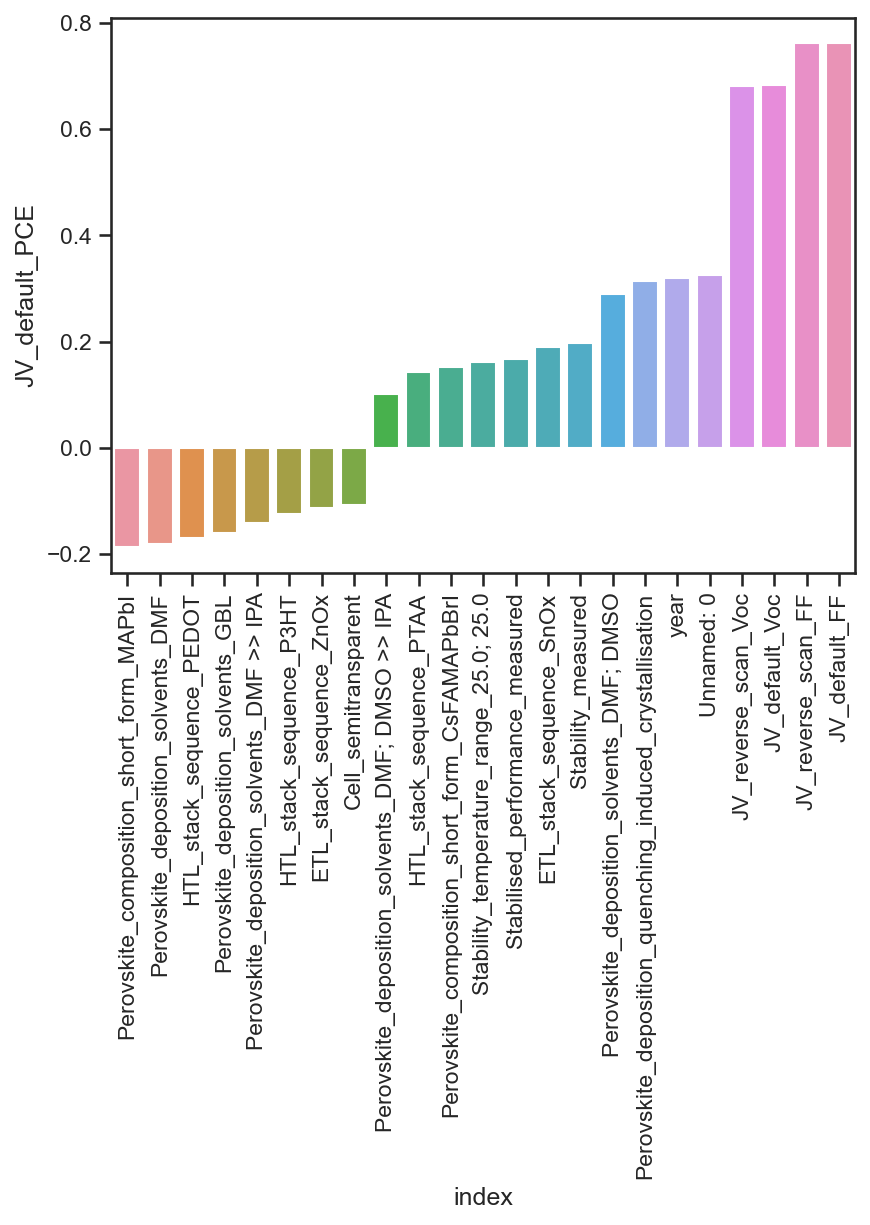

In [18]:
sns.barplot(data=correlation2[:-4], x='index',y='JV_default_PCE')
plt.xticks(rotation=90);

In [ ]:
correlation_Voc = pd.DataFrame(df_dummies.corr()['JV_default_Voc'][:-1].sort_values()).reset_index()


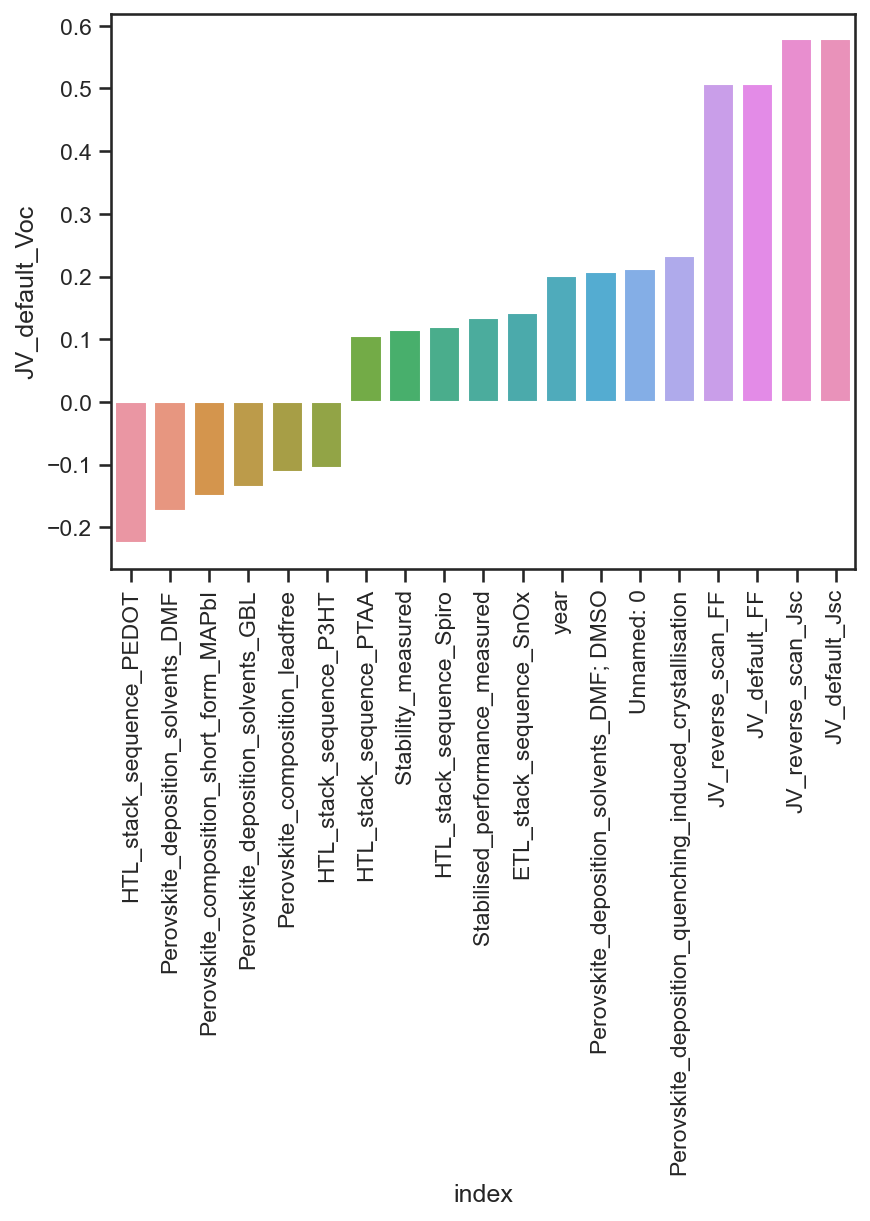

In [21]:
correlation_Voc2 = correlation_Voc.loc[abs(correlation_Voc['JV_default_Voc']) > 0.1 ]

sns.barplot(data=correlation_Voc2[:-4], x='index',y='JV_default_Voc')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='JV_default_PCE', ylabel='Density'>

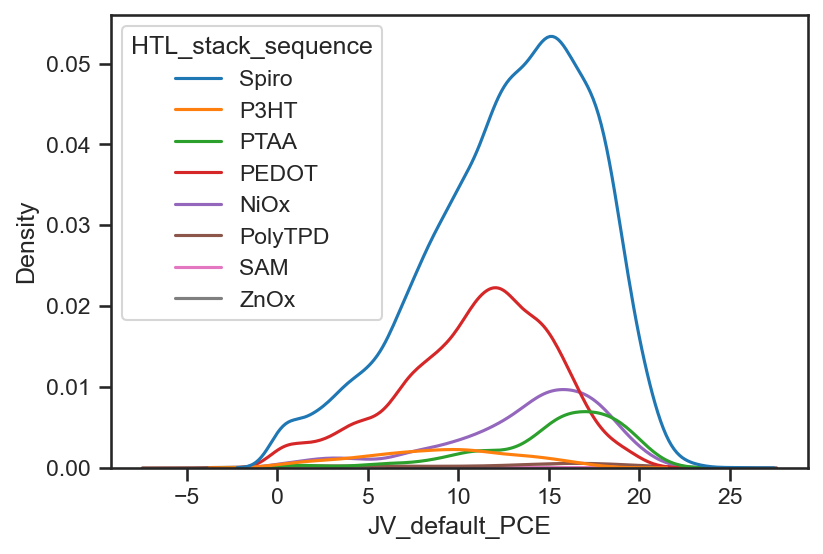

In [104]:
sns.kdeplot(data=df2, x=df2['JV_default_PCE'], hue='HTL_stack_sequence')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

Index(['Unnamed: 0', 'Cell_area_measured',
       'Cell_number_of_cells_per_substrate', 'Cell_flexible',
       'Cell_semitransparent', 'Perovskite_single_crystal',
       'Perovskite_dimension_0D', 'Perovskite_dimension_2D',
       'Perovskite_dimension_2D3D_mixture', 'Perovskite_dimension_3D',
       ...
       'Stability_temperature_range_65.0; 65.0',
       'Stability_temperature_range_70.0; 70.0',
       'Stability_temperature_range_80.0; 80.0',
       'Stability_temperature_range_80; 80',
       'Stability_temperature_range_82.0; 82.0',
       'Stability_temperature_range_85.0; 85.0',
       'Stability_temperature_range_85; 85',
       'Stability_temperature_range_90.0; 90.0',
       'Stability_temperature_range_95.0; 95.0',
       'Stability_temperature_range_nan; nan'],
      dtype='object', length=1177)

In [45]:
df_dummies_cleaned = df_dummies.loc[:, ~df_dummies.columns.str.contains("reverse|light|certified")]

In [46]:
X = df_dummies_cleaned.loc[:, ~df_dummies_cleaned.columns.str.contains("default")]

In [47]:
y = df_dummies_cleaned['JV_default_PCE']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [50]:
X_train_scaled = scaler.fit_transform(X_train)

In [51]:
X_test_scaled = scaler.transform(X_test)

MAE = 2.54
MSE = 10.85
RMSE = 3.29


Text(0.5, 0, 'Predicted PCE [%]')

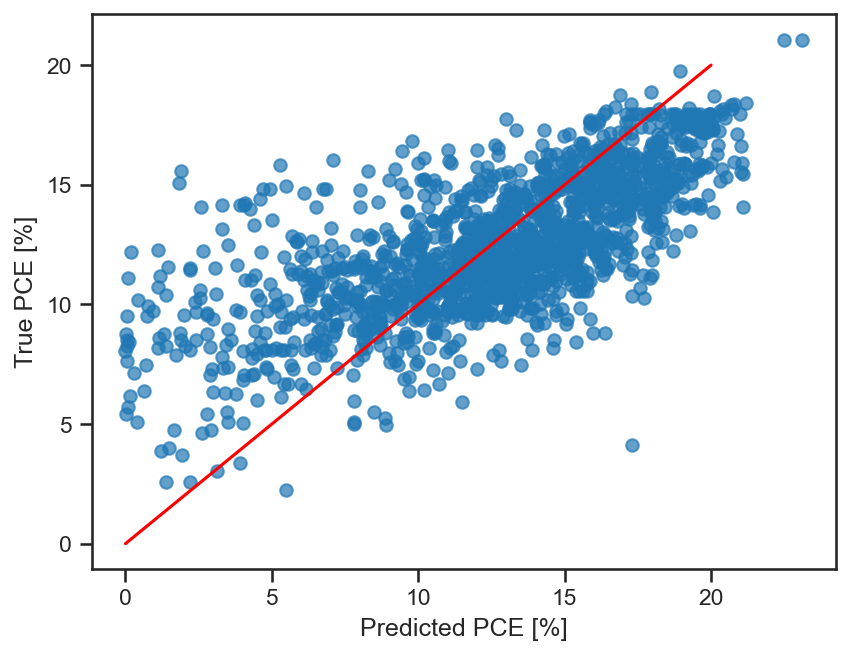

In [52]:
import numpy as np
#
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

rf = HistGradientBoostingRegressor(quantile=None,
    learning_rate=0.1,
    max_iter=100,
    max_leaf_nodes=31,
    max_depth=25,
    min_samples_leaf=10,
    l2_regularization=0.0,
    max_bins=255)

rf.fit(X_train_scaled, y_train)

test_predictions = rf.predict(X_test_scaled)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print(f'MAE = {np.round(MAE,2)}')
print(f'MSE = {np.round(MSE,2)}')
print(f'RMSE = {np.round(RMSE,2)}')

x = np.linspace(0, 20, 100)
y_plot = x

plt.scatter(y_test, test_predictions, alpha=0.7)
plt.plot(x, y_plot, color='r')
plt.ylabel('True PCE [%]')
plt.xlabel('Predicted PCE [%]')


In [59]:
np.sum((np.isnan(X_train)))

Unnamed: 0                                0
Cell_area_measured                        0
Cell_number_of_cells_per_substrate        0
Cell_flexible                             0
Cell_semitransparent                      0
                                         ..
Stability_temperature_range_85.0; 85.0    0
Stability_temperature_range_85; 85        0
Stability_temperature_range_90.0; 90.0    0
Stability_temperature_range_95.0; 95.0    0
Stability_temperature_range_nan; nan      0
Length: 1166, dtype: int64

In [75]:
X_test_scaled

array([[-0.23457473, -0.02350253, -0.11368234, ..., -0.01901333,
        -0.00850179,  0.39397228],
       [-0.35179039, -0.12739841, -0.11368234, ..., -0.01901333,
        -0.00850179,  0.39397228],
       [ 0.58329155, -0.18305692, -0.11368234, ..., -0.01901333,
        -0.00850179,  0.39397228],
       ...,
       [-0.44802453, -0.03463424, -0.11368234, ..., -0.01901333,
        -0.00850179,  0.39397228],
       [-0.1480053 , -0.07173991, -0.11368234, ..., -0.01901333,
        -0.00850179, -2.53824962],
       [-0.95067237, -0.0160814 , -0.11368234, ..., -0.01901333,
        -0.00850179,  0.39397228]])

 98%|===================| 13580/13836 [00:37<00:00]        

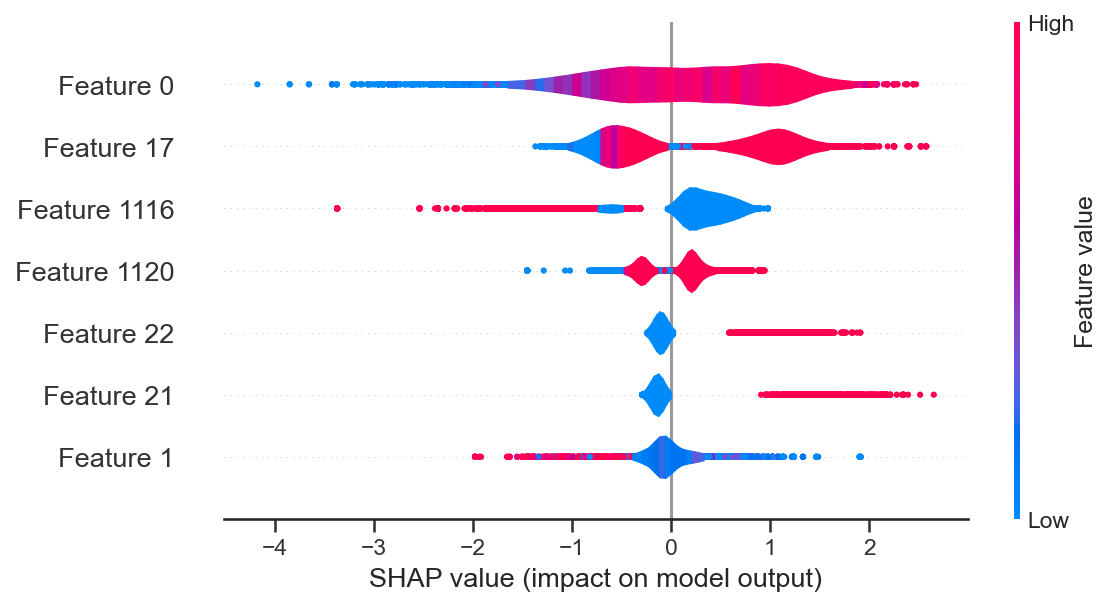

In [76]:
import shap

shap.initjs()
explainer = shap.Explainer(rf, np.array(X_train_scaled, dtype='float64'))
shap_values = explainer(np.array(X_train_scaled, dtype='float64'), check_additivity=False)

# fig, axs = plt.subplots(ncols=2)
# fig.suptitle(f"eigenimage {pc_index}")
# plot_shap_values_with_names(axs[1], shap_values, feature_names, top_n=5)
# plot_eigenmage(axs[1], ipca.components_[pc_index, :].reshape(*new_shape))
# plt.sca(axs[0])
shap.plots.violin(shap_values, X_train_scaled, max_display=7)

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
random_forest = RandomForestRegressor(max_depth=6)


In [79]:
random_forest.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=6)

MAE = 2.99
MSE = 14.53
RMSE = 3.81


Text(0.5, 0, 'Predicted PCE [%]')

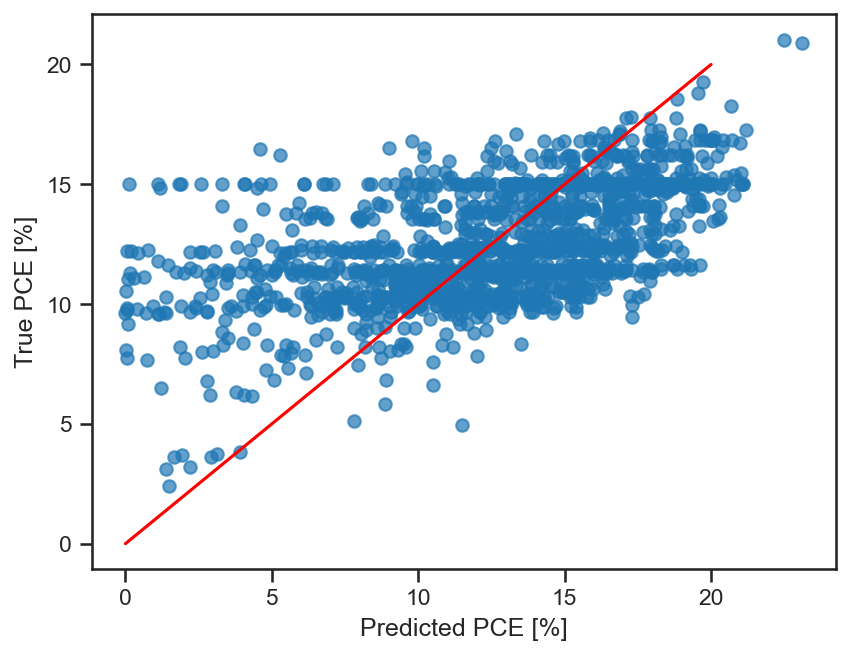

In [80]:
test_predictions = random_forest.predict(X_test_scaled)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print(f'MAE = {np.round(MAE,2)}')
print(f'MSE = {np.round(MSE,2)}')
print(f'RMSE = {np.round(RMSE,2)}')

x = np.linspace(0, 20, 100)
y_plot = x

plt.scatter(y_test, test_predictions, alpha=0.7)
plt.plot(x, y_plot, color='r')
plt.ylabel('True PCE [%]')
plt.xlabel('Predicted PCE [%]')